Import libraries:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

Data load:

In [13]:
from sklearn.datasets import load_iris
data = load_iris().data
target = load_iris().target

df_1 = pd.DataFrame(data = data, columns= load_iris().feature_names)
df_2 = pd.DataFrame(data = target, columns= ['Iris_class'])

df = pd.concat([df_1,df_2], axis=1)

df.head(3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


Data description:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris_class         150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
df.describe().T.apply(lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
Iris_class,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


Data visualisation:

In [16]:
px.scatter_matrix(data_frame = df,color ='Iris_class', title = 'Dataset description')

In [17]:
px.scatter(data_frame = df,x = 'petal length (cm)',
           y = 'petal width (cm)',color ='Iris_class',
          title = 'Data to decission trees')

Preparing data to model:

In [18]:
X = df[['petal length (cm)','petal width (cm)']]
X = X.values
Y = target.astype('int')

X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Decision tree classifier:

In [20]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth= 1,random_state = 30)
classifier.fit(X,Y)

DecisionTreeClassifier(max_depth=1, random_state=30)

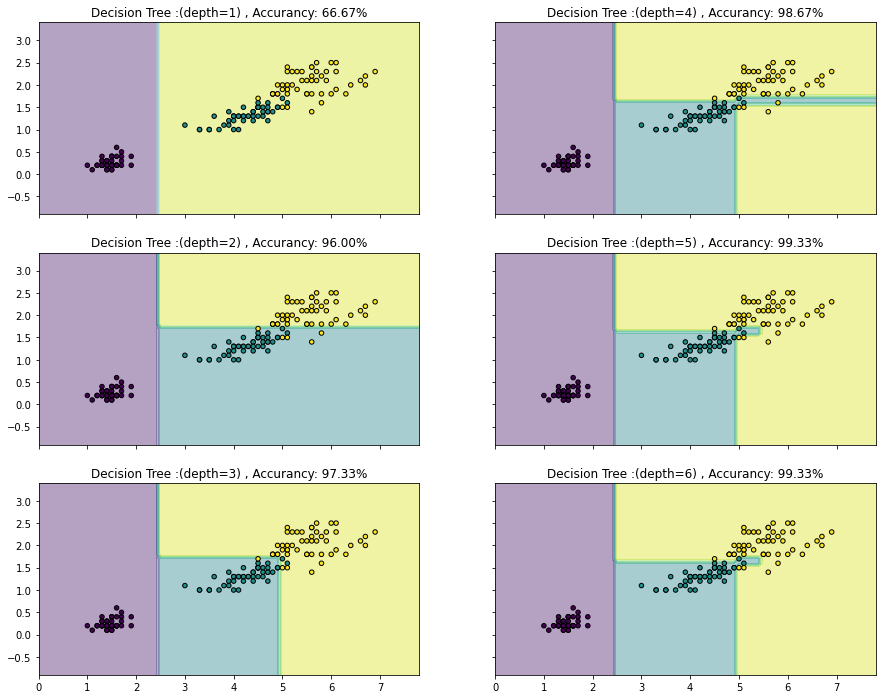

In [21]:
from sklearn.tree import DecisionTreeClassifier
from itertools import product

depth_range = range(1,7)
nb_of_rows = int((max(depth_range)/2))

plot_step = 0.02
f, axarr = plt.subplots(nb_of_rows,2, sharex='col', sharey='row', figsize=(15, 12))

for depth in depth_range:
    
    title = f'Decision Tree :(depth={depth})'
    
    classifier = DecisionTreeClassifier(max_depth= depth,random_state = 30)
    classifier.fit(X,Y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

    


    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if depth <= nb_of_rows:
        axarr[depth-1,0].contourf(xx, yy, Z, alpha=0.4)
        axarr[depth-1,0].scatter(X[:, 0], X[:, 1], c=Y,
                                          s=20, edgecolor='k')
        axarr[depth-1,0].set_title(f'{title} , Accurancy: {classifier.score(X,Y)*100:.2f}%')
    else:
        axarr[depth-nb_of_rows-1,1].contourf(xx, yy, Z, alpha=0.4)
        axarr[depth-nb_of_rows-1,1].scatter(X[:, 0], X[:, 1], c=Y,
                                          s=20, edgecolor='k')
        axarr[depth-nb_of_rows-1,1].set_title(f'{title} , Accurancy: {classifier.score(X,Y)*100:.2f}%')

plt.show()

Form plot chosen optimal max depth = 3.
Graph of decision tree:

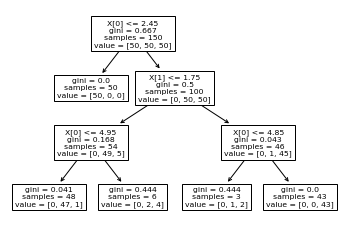

In [22]:
from sklearn.tree import plot_tree
_= plot_tree(DecisionTreeClassifier(max_depth= 3,random_state = 30).fit(X,Y)) 

Optimal classifier:

In [23]:
classifier = DecisionTreeClassifier(max_depth= 3,random_state = 30).fit(X,Y)
print(f'Accurance: {classifier.score(X,Y)*100:.2f}%')

Accurance: 97.33%


Plot of decision tree:

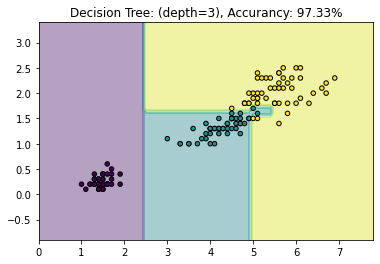

In [24]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y,s=20, edgecolor='k')
title = f'Decision Tree: (depth={classifier.max_depth})'
_= plt.title(f'{title}, Accurancy: {classifier.score(X,Y)*100:.2f}%')